In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


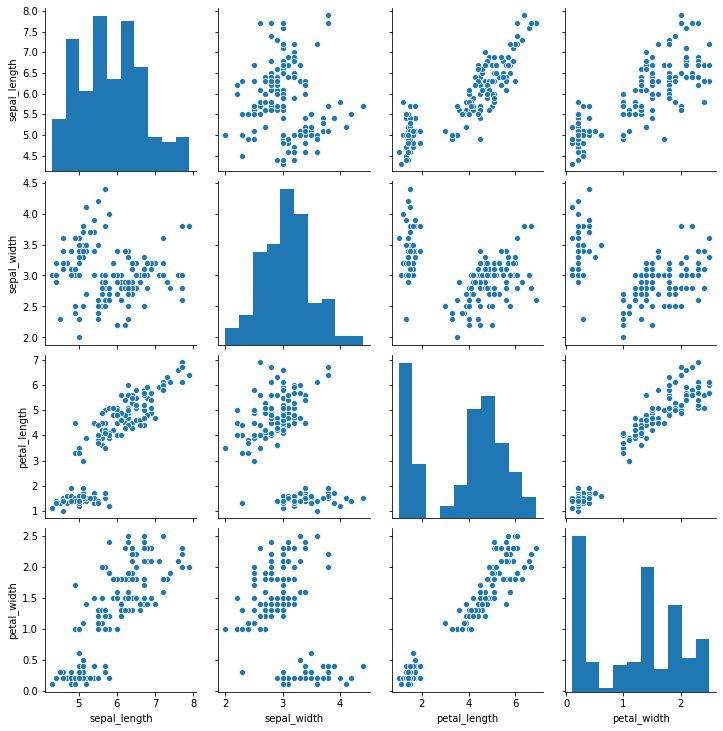

In [6]:
sns.pairplot(df)

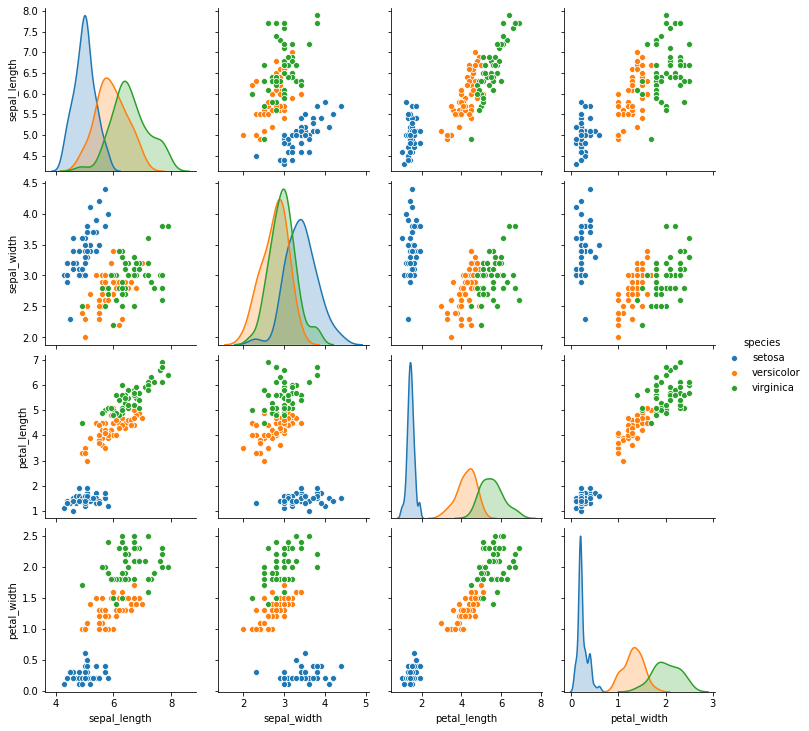

In [7]:
sns.pairplot(df, hue = 'species')

In [8]:
X = df.drop('species', axis = 1)

In [9]:
X.shape

(150, 4)

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Hopkins

In [12]:
from pyclustertend import hopkins

In [25]:
hopkins(X, X.shape[0])        # < 0.3 so it has clustering tendency (positve)

0.17018456257783066

# Elbow Method

In [26]:
ssd = []

K = range(1, 10)

for k in K:
    model = KMeans(n_clusters = k)
    model.fit(X)
    ssd.append(model.inertia_)

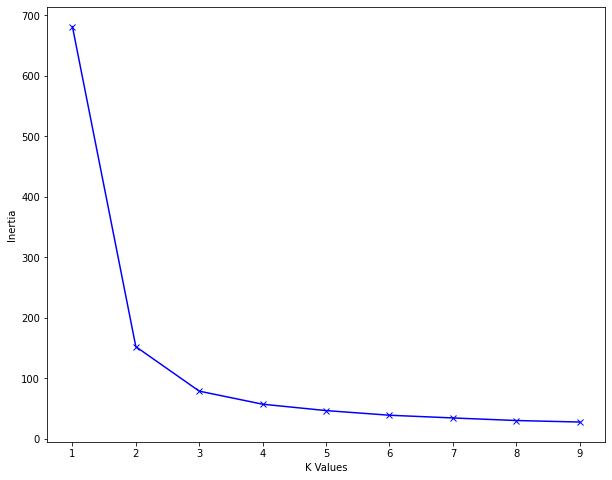

In [29]:
plt.figure(figsize = (10, 8))
plt.plot(K, ssd, 'bx-')
plt.xlabel('K Values')
plt.ylabel('Inertia')
plt.show()

In [30]:
from sklearn.cluster import KMeans

In [31]:
model = KMeans(n_clusters = 3)
model.fit(X)
model

KMeans(n_clusters=3)

In [34]:
model.inertia_             # inertia =  Sum of squared distances of samples to their closest cluster center

78.851441426146

In [35]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [36]:
clusters = model.labels_

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
df['predicted_clusters'] = clusters

In [43]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [44]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
98,5.1,2.5,3.0,1.1,versicolor,0
147,6.5,3.0,5.2,2.0,virginica,2
17,5.1,3.5,1.4,0.3,setosa,1
63,6.1,2.9,4.7,1.4,versicolor,0
25,5.0,3.0,1.6,0.2,setosa,1


In [45]:
ct = pd.crosstab(df['predicted_clusters'], df['species'])

In [50]:
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


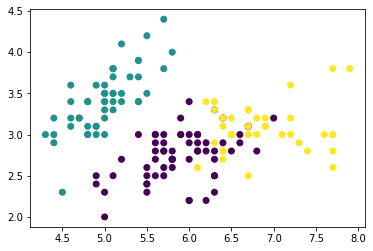

In [54]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clusters, cmap="viridis")

In [57]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [58]:
centers = model.cluster_centers_

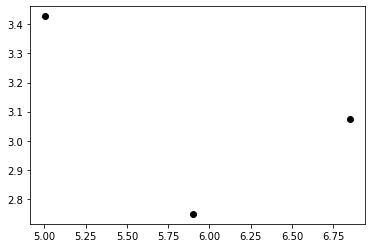

In [64]:
plt.scatter(centers[:,0], centers[:,1], c="black")

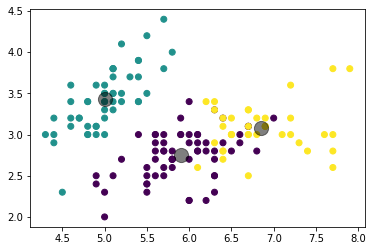

In [66]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clusters, cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], c="black", alpha = 0.5, s = 200)